In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [45]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [46]:
import torch.distributions as dist

In [47]:
theta = 0.9

In [48]:
def prob(theta, data):
    dist2 = dist.Bernoulli(probs=theta)
    prob = np.exp(1)
    for i in range(len(data)):
        prob *= dist2.log_prob(data[i]).exp()
    return prob

In [49]:
probs = []
ber = dist.Bernoulli(probs=theta)
data = ber.sample((10,))

In [50]:
thetas = np.linspace(0.01, 0.99, 100)
for i in range(100):
    ber = dist.Bernoulli(torch.tensor([theta]))
    probs.append(prob(theta=thetas[i], data=data))

In [51]:
probs = torch.tensor(probs)

Text(0.5, 1.0, 'Likelihood function for Bernoulli distribution')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

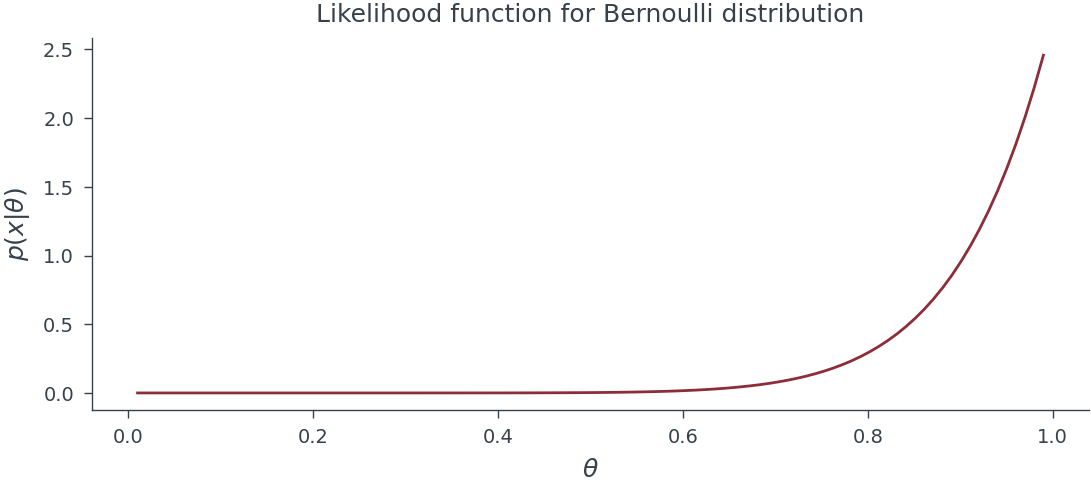

In [52]:
plt.plot(thetas, probs)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(x|\theta)$')
plt.title(r'Likelihood function for Bernoulli distribution')
# plt.savefig('D:/IITGN/Sem-7/pml/pml-teaching/figures/mle/bernoulli_likelihood_2.pdf')

In [53]:
from ipywidgets import interact

In [57]:
@interact(seed=(1, 10))
def plot_likelihood(seed):
    ber = dist.Bernoulli(probs=0.3)
    data = ber.sample(sample_shape=(10,))
    thetas = np.linspace(0.01, 0.99, 100)
    probs = []
    for i in range(100):
        ber = dist.Bernoulli(torch.tensor([theta]))
        probs.append(prob(theta=thetas[i], data=data))
    probs = torch.tensor(probs)
    plt.plot(thetas, probs)
    plt.xticks(np.linspace(0, 1, 11))
    plt.xlabel(r"Probability of head: $\theta$")
    plt.ylabel(r"likelihood: $p(D|\theta)$")
    plt.title(f"Data ={data}")
    plt.grid(True)

interactive(children=(IntSlider(value=5, description='seed', max=10, min=1), Output()), _dom_classes=('widget-…